### This Program predicts Employee Attrition
### Employee attrition is defined as the natural process by which employees leave the workforce (for example through resignation for personal reasons or retirement – and are not immediately replaced

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [2]:
# Loading the data
df = pd.read_csv('D:\Projects\Employee Attrition\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# Display first 5 rows
df.head()    

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Get the number of Rows & Columns
df.shape

(1470, 35)

In [5]:
# Get the Column Data Types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Getting the Column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#Pandas dataframe.info() function can be used to get a concise summary of the dataframe.
#It comes really handy when doing exploratory analysis of the data. It also helps to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
# Getting actual count of empty values for each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# View some Statisticcal details like mean, std dev, percentile,etc.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# Number of employees that stayed (no) and the number of employess that left (yes) the company.
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

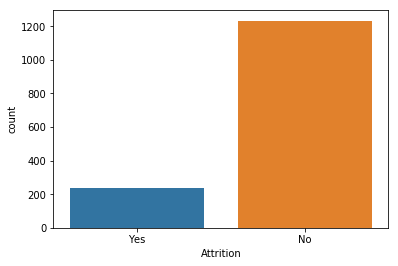

In [11]:
# Getting a visual for the count we got
sns.countplot(df['Attrition'])

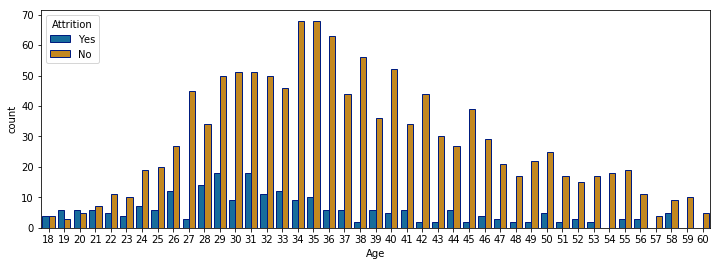

In [12]:
# Number of employees that left and stayed at the company based on Age
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind",edgecolor=sns.color_palette("dark", n_colors = 1))

In [13]:
# In above plot we can see that the age with the highest count of employee attrition is age 29 & 31. 
# The age with the highest retention is age 34 & 35.

In [14]:
#Age

(mu,sigma)=norm.fit(df.loc[df['Attrition']=='Yes','Age'])
print("Average age of Ex-employees is {:.2f} and standard deviation {:.2f}".format(mu,sigma))

(mu,sigma)=norm.fit(df.loc[df['Attrition']=='No','Age'])
print("Average age of Current employees is {:.2f} and standard deviation {:.2f}".format(mu,sigma))

# The average age of ex-employees is 33.61 years old, while 37.56 is the average age for current employees.

Average age of Ex-employees is 33.61 and standard deviation 9.67
Average age of Current employees is 37.56 and standard deviation 8.88


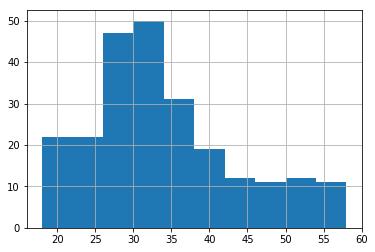

In [15]:
df.loc[df['Attrition']=='Yes','Age'].hist()

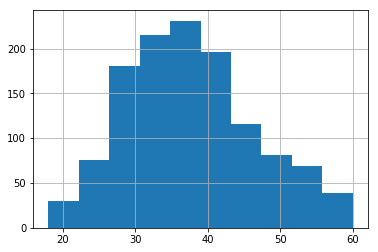

In [16]:
df.loc[df['Attrition']=='No','Age'].hist()

In [17]:
# Education field
# Several Education Fields are represented in the dataset,
# namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other.
# Here, I plot the normalized % of Leavers for each Education Field.

In [18]:
#Education field of employees
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

,Field,% of Leavers
0,Life Sciences,14.686469
1,Other,13.414634
2,Medical,13.577586
3,Marketing,22.012579
4,Technical Degree,24.242424
5,Human Resources,25.925926


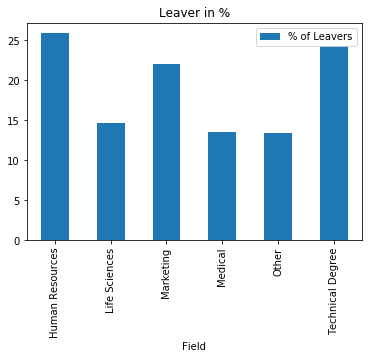

In [19]:
df_EducationField=pd.DataFrame(columns=["Field","% of Leavers"])
i=0
for field in list(df["EducationField"].unique()):
    ratio=df[(df['EducationField']==field) & (df['Attrition']=='Yes')].shape[0]/df[df['EducationField']==field].shape[0]
    df_EducationField.loc[i]=(field,ratio*100)
    i+=1

df_EducationField.groupby('Field').sum().plot(kind='bar',title='Leaver in %')
df_EducationField.head(10)

In [20]:
#Gender
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [21]:
# Current & ex-eployees details

print("Ex-employees Male :",df[((df['Gender']=='Male') & (df['Attrition']=='Yes'))].shape[0])
print("Ex-employees Female :",df[((df['Gender']=='Female') & (df['Attrition']=='Yes'))].shape[0])
print("Current employees Male :",df[((df['Gender']=='Male') & (df['Attrition']=='No'))].shape[0])
print("Current employees Female :",df[((df['Gender']=='Female') & (df['Attrition']=='No'))].shape[0])

# Gender distribution shows that the dataset features,  
# a higher relative proportion of male ex-employees than female ex-employees and 
# also a higher relative proportion of male current employees than female current employees

Ex-employees Male : 150
Ex-employees Female : 87
Current employees Male : 732
Current employees Female : 501


,Gender,% of Leavers
0,Female,14.795918
1,Male,17.006803


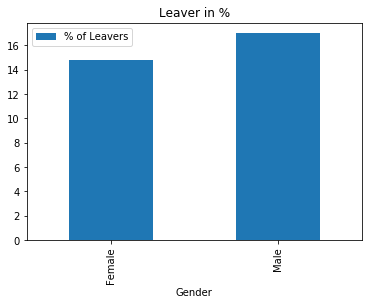

In [22]:
df_GenderField=pd.DataFrame(columns=["Gender","% of Leavers"])
i=0
for field in list(df["Gender"].unique()):
    ratio=df[(df['Gender']==field) & (df['Attrition']=='Yes')].shape[0]/df[df['Gender']==field].shape[0]
    df_GenderField.loc[i]=(field,ratio*100)
    i+=1

df_GenderField.groupby('Gender').sum().plot(kind='bar',title='Leaver in %')

df_GenderField.head()

In [23]:
#Marital Status
# The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees).
# Single employees show the largest proportion of leavers at 25%.

In [24]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

,Status,% Leavers
0,Single,25.531915
1,Married,12.481426
2,Divorced,10.091743


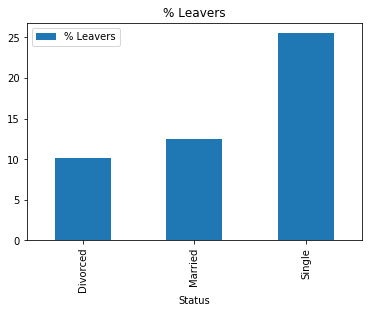

In [25]:
df_MaritalField=pd.DataFrame(columns=['Status','% Leavers'])
i=0
for field in list(df['MaritalStatus'].unique()):
    ratio=df[(df['MaritalStatus']==field)& (df['Attrition']=='Yes')].shape[0]/df[(df['MaritalStatus']==field)].shape[0]
    df_MaritalField.loc[i]=(field,ratio*100)
    i+=1

df_MaritalField.groupby('Status').sum().plot(kind='bar',title='% Leavers')
df_MaritalField.head()

In [26]:
# Department
# The data features employee data from three departments: Research & Development, Sales, and Human Resources

In [27]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

,Department,% Leavers
0,Sales,20.627803
1,Research & Development,13.839750
2,Human Resources,19.047619


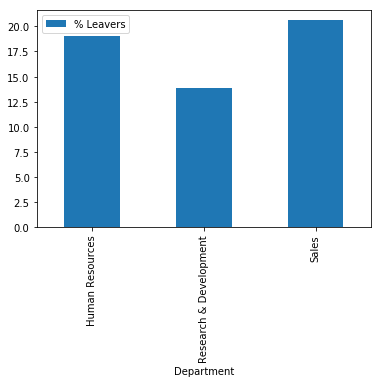

In [28]:
df_DepartmentField=pd.DataFrame(columns=['Department','% Leavers'])
i=0
for field in list(df['Department'].unique()):
    ratio=df[(df['Department']==field) & (df['Attrition']=='Yes')].shape[0]/df[(df['Department']==field)].shape[0]
    df_DepartmentField.loc[i]=(field,ratio*100)
    i+=1
df_DepartmentField.groupby('Department').sum().plot(kind='bar')
df_DepartmentField.head()

In [29]:
# Role and Work Conditions
# A preliminary look at the relationship between Business Travel frequency and 
# Attrition Status shows that there is a largest normalized proportion of Leavers
# for employees that travel "frequently". Travel metrics associated 
# with Business Travel status were not disclosed (i.e. how many hours of Travel is considered "Frequent").

In [30]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

,Travel,% Leavers
0,Travel_Rarely,14.956855
1,Travel_Frequently,24.909747
2,Non-Travel,8.000000


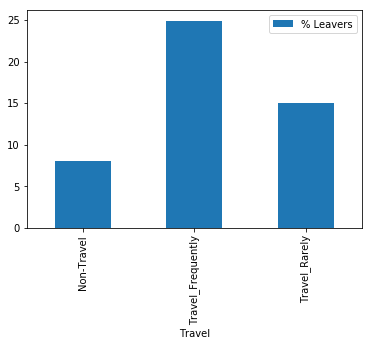

In [31]:
df_TravelField=pd.DataFrame(columns=['Travel','% Leavers'])
i=0
for field in list(df['BusinessTravel'].unique()):
    ratio=df[(df['BusinessTravel']==field) & (df['Attrition']=='Yes')].shape[0]/df[(df['BusinessTravel']==field)].shape[0]
    df_TravelField.loc[i]=(field,ratio*100)
    i+=1
df_TravelField.groupby('Travel').sum().plot(kind='bar')
df_TravelField.head()

In [32]:
#Job Role
# Several Job Roles are listed in the dataset: Sales Executive, Research Scientist, Laboratory Technician,
# Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

In [33]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

,Role,% Leavers
0,Sales Executive,17.484663
1,Research Scientist,16.095890
2,Laboratory Technician,23.938224
3,Manufacturing Director,6.896552
4,Healthcare Representative,6.870229


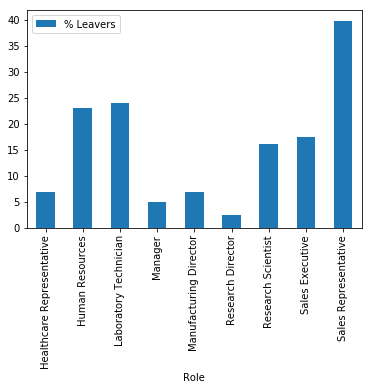

In [34]:
df_JobField=pd.DataFrame(columns=['Role','% Leavers'])
i=0
for field in list(df['JobRole'].unique()):
    ratio=df[(df['JobRole']==field) & (df['Attrition']=='Yes')].shape[0]/df[(df['JobRole']==field)].shape[0]
    df_JobField.loc[i]=(field,ratio*100)
    i+=1
df_JobField.groupby('Role').sum().plot(kind='bar')
df_JobField.head()

In [35]:
#Job Role
# Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). 
# Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [36]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

,Level,% Leavers
0,2.0,9.737828
1,1.0,26.335175
2,3.0,14.678899
3,4.0,4.716981
4,5.0,7.246377


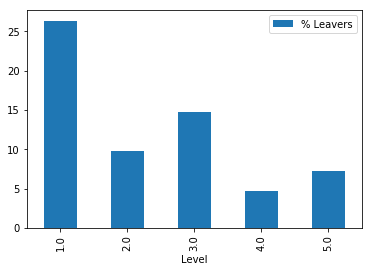

In [37]:
df_LevelField=pd.DataFrame(columns=['Level','% Leavers'])
i=0
for field in list(df['JobLevel'].unique()):
    ratio=df[(df['JobLevel']==field) & (df['Attrition']=='Yes')].shape[0]/df[(df['JobLevel']==field)].shape[0]
    df_LevelField.loc[i]=(field,ratio*100)
    i+=1
df_LevelField.groupby('Level').sum().plot(kind='bar')
df_LevelField.head()

In [38]:
# A ranking is associated to the employee's Job Involvement :1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
# The plot below indicates a negative correlation with the Job Involvement of an employee and the Attrition Status.
# In other words, employees with higher Job Involvement are less likely to leave.

In [39]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

,Involvement,% Leavers
0,3.0,14.400922
1,2.0,18.933333
2,4.0,9.027778
3,1.0,33.734940


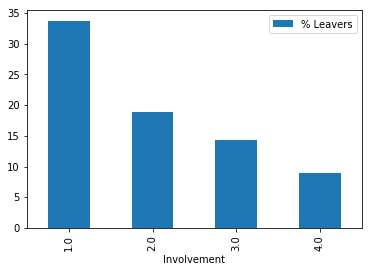

In [40]:
df_InvolvementField=pd.DataFrame(columns=['Involvement','% Leavers'])
i=0
for field in list(df['JobInvolvement'].unique()):
    ratio=df[(df['JobInvolvement']==field) & (df['Attrition']=='Yes')].shape[0]/df[(df['JobInvolvement']==field)].shape[0]
    df_InvolvementField.loc[i]=(field,ratio*100)
    i+=1
df_InvolvementField.groupby('Involvement').sum().plot(kind='bar')
df_InvolvementField.head()

In [41]:
#Attrition
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [42]:
print("Percentage of Current Employees is {:.2f}% and of Ex-employees is: {:.2f}%".format(
    df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100,
    df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100))

Percentage of Current Employees is 83.88% and of Ex-employees is: 16.12%


In [43]:
# As shown on the chart above, we see this is an imbalanced class problem. 
# Indeed, the percentage of Current Employees in our dataset is 83.88% and the percentage of Ex-employees is: 16.12%

# Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. 
# We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

In [44]:
# Print all of the columns data types and their unique values along with the values for each column
# This is to check unique values in cateogorical data
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [45]:
# Checking unique value count for non-categorical columns
for column in df.columns:
    if df[column].dtype != object: 
        print(str(column) + ' : ' + str(df[column].unique()))
        print("_________________________________________________________________\n")
    

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
_________________________________________________________________

DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  

In [46]:
# From above unique values we can say there are some unwanted columns like,
# StandardHours - It contains only one value,i.e 80 
# Over18 - It contains all 'Yes' values
# EmployeeCount - It contains only one value, i.e. 1
# Employee Number - This wont add much value
# Above columns would not add any additional information to the model. We will remove these columns from the data set.

In [47]:
# Removing columns that are not required
df = df.drop('StandardHours', axis = 1)
df = df.drop('Over18', axis = 1)
df = df.drop('EmployeeCount', axis = 1) 
df = df.drop('EmployeeNumber', axis = 1)

In [48]:
# Correlation
# Let's take a look at some of most significant correlations between columns. 
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


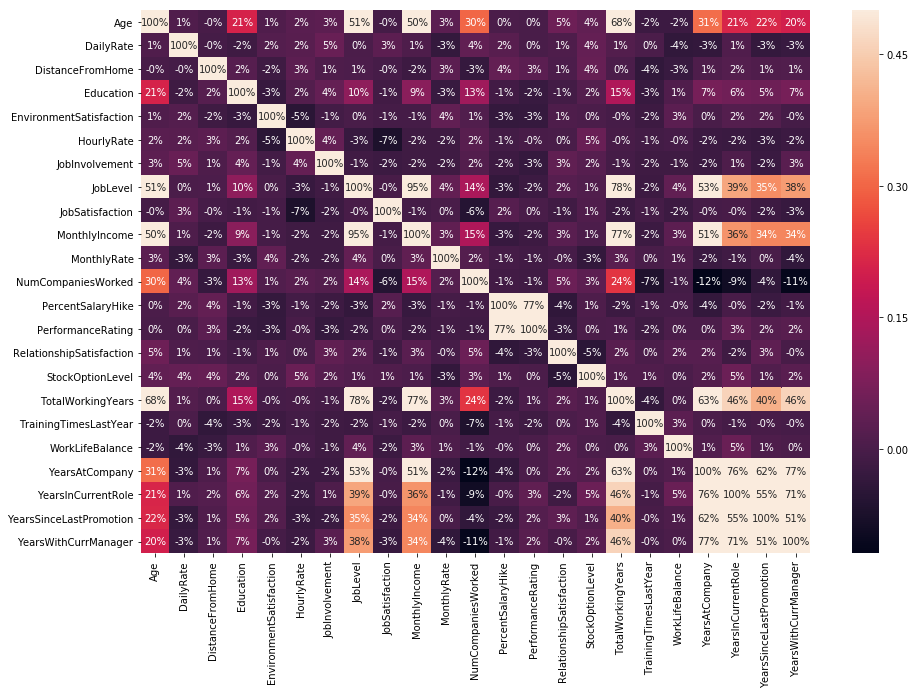

In [49]:
# Let's plot a heatmap to visualize the correlation between Attrition and these factors.
plt.figure(figsize=(15,10))  #15in by 10in
sns.heatmap(df.corr(),
            vmax=.5, #Set max value for color bar
            annot=True, 
            fmt='.0%')

In [50]:
# EDA Concluding Remarks ( EDA - Exploratory Data Analysis)

# Let's summarise the findings from this EDA:
# The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
# The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
# The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
# The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
# Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

# Other observations include:
# Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
# About 10% of leavers left when they reach their 2-year anniversary at the company.
# Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.
# People who live further away from their work show higher proportion of leavers compared to their counterparts.
# People who travel frequently show higher proportion of leavers compared to their counterparts.
# People who have to work overtime show higher proportion of leavers compared to their counterparts.
# Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
# Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.

In [51]:
# Machine Learning algorithms can typically only have numerical values as their predictor variables. 
# Hence Label Encoding becomes necessary as they encode categorical labels with numerical values.
# To avoid introducing feature importance for categorical features with large numbers of unique values,
# we will use both Lable Encoding and One-Hot Encoding as shown below.

In [52]:
#Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le=LabelEncoder()

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = le.fit_transform(df[column])

In [53]:
# Creating a new column to store the age values in.This is only to put the age values at the end of the data set.
df['Age_Years'] = df['Age']

# Then I will remove the column age from the front of the data set so that the target column is first.
df = df.drop('Age', axis = 1)

# Display dataframe
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
5,0,1,572,1,1,1,1,3,1,49,...,2,0,8,2,1,7,7,3,6,14
6,0,2,770,1,2,2,3,2,0,51,...,0,3,12,3,1,1,0,0,0,41
7,0,2,794,1,23,0,1,3,1,37,...,1,1,1,2,2,1,0,0,0,12
8,0,1,78,1,22,2,1,3,1,14,...,1,0,10,2,2,9,7,1,8,20
9,0,2,751,1,26,2,3,2,1,64,...,1,2,17,3,1,7,7,7,7,18


In [54]:
# Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values

In [55]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [56]:
# Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
# Get the accuracy on the training data
forest.score(X_train, Y_train)

0.9791288566243194

In [58]:
# Confusion matrix and accuracy for  the model on the test data
# Classification accuracy which is the ratio of correct predictions to total predictions made.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]  # True Negative
TP = cm[1][1]  # True Positive
FN = cm[1][0]  # False Negative
FP = cm[0][1]  # False Positive
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()  # Print a new line

[[309   1]
 [ 49   9]]
Model Testing Accuracy = "0.8641304347826086!"



In [59]:
# Accuracy of model & Confusion matrix for model can also be checked as follows:

from sklearn.metrics import accuracy_score,confusion_matrix

pred = forest.predict(X_test)

print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred))

[[309   1]
 [ 49   9]]
0.8641304347826086


In [60]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.071
Age_Years,0.067
DailyRate,0.067
MonthlyRate,0.055
HourlyRate,0.052
TotalWorkingYears,0.051
YearsWithCurrManager,0.048
JobRole,0.044
DistanceFromHome,0.042


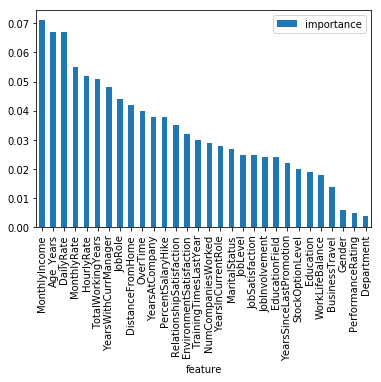

In [61]:
# Visualize the importance
importances.plot.bar()

In [62]:
# Monthly income appears to be the most important feature followed by the persons age, daily rate, and monthly rate. 
# Seeing this result makes me want to see if people with a higher income are less likely to leave than someone with a lower income.